In [7]:
from code.util import *
from code.preprocessor import *

# -

In [11]:
urls = load("data/urls.pkl")

In [4]:
len(urls), len(urls[urls.target==0]), len(urls[urls.target==1])

(1063837, 1048576, 15261)

In [5]:
urls.target.unique()

array([0, 1])

---

In [23]:
# shuffle and sample 5% or normal urls
url0 = urls[urls.target==0]
url0 = url0.sample(frac=1.0, random_state=42)
url0 = url0.sample(frac=0.05, random_state=42)
url0 = url0.reset_index(drop=True)

In [24]:
len(url0)

52429

In [25]:
url1 = urls[urls.target==1]
urls_sampled = pd.concat([url0, url1])
urls_sampled = urls_sampled.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [18]:
len(urls_sampled)

67690

# -

In [8]:
urls = load("data/urls_sampled.pkl")

---

In [4]:
urls.url = urls.url.apply(clean_url)

In [5]:
urls.url.tail()

67685                  mobygames.com/game/sheet/gameid=194
67686                          prosites-okdc.homestead.com
67687    arifabseiso.com/wp-content/plugins/photo-galle...
67688                                         levyland.com
67689                                        catdoctor.com
Name: url, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=split)
vect.fit(urls.url)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function split at 0x12cefe680>, vocabulary=None)

In [7]:
from sklearn.model_selection import train_test_split

X = urls.url
y = urls.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
train_vects = vect.transform(X_train).toarray()

In [9]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(train_vects, y_train)

In [10]:
test_vects = vect.transform(X_test).toarray()

In [11]:
from sklearn.metrics import classification_report

y_pred = model_mult.predict(test_vects)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20948
           1       0.95      0.83      0.89      6128

    accuracy                           0.95     27076
   macro avg       0.95      0.91      0.93     27076
weighted avg       0.95      0.95      0.95     27076



---

In [6]:
from keras.preprocessing.text import *

In [23]:
texts = [
    "https://www.google.com",
]

t = Tokenizer(oov_token='z')

In [13]:
t_char = Tokenizer(char_level=True)

In [17]:
t_char.fit_on_texts(['abc@d-ef'])

In [20]:
t_char.word_index

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, '@': 7, '-': 8}

In [19]:
t_char.texts_to_matrix(["ac@e"], mode='count')

array([[0., 1., 0., 1., 0., 1., 0., 1., 0.]])

In [24]:
t.fit_on_texts(texts)

In [10]:
t.texts_to_matrix(texts, mode='count')

array([[0., 1., 1., 1., 1.]])

In [12]:
t.texts_to_matrix(texts, mode='tfidf')

array([[0.        , 0.40546511, 0.40546511, 0.40546511, 0.40546511]])

In [25]:
print(t.word_index)

{'z': 1, 'https': 2, 'www': 3, 'google': 4, 'com': 5}


In [27]:
t.texts_to_matrix(['hello.apple.google.com'], mode='count')

array([[0., 2., 0., 0., 1., 1.]])

In [1]:
from gensim.models.word2vec import Word2Vec

In [11]:
model = Word2Vec(size=10, batch_words=10)

In [12]:
model.build_vocab(urls.url[:1000])

In [56]:
model = Word2Vec(sequences)

W0806 15:00:49.507866 4436755904 base_any2vec.py:1386] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


In [58]:
sequences[0]

['http', 'www', 'fridays', 'com', 'hr', 'jobs', 'htm']

In [10]:
model.wv.get_vector("www")

KeyError: "word 'www' not in vocabulary"

In [75]:
urls

,target,url
0,0,http://www.fridays.com/hr/jobs.htm
1,0,http://www.fopcu.edu.eg
2,0,http://www.locum-tenens.com/
3,1,https://chrodesolutions.co.za/wp-includes/pomo...
4,0,http://www.theage.com.au/articles/2002/09/07/1...
5,1,http://routingnumberinfo.com/aba/bank-of-ameri...
6,0,http://d2y.home.mindspring.com/
7,0,http://www.guitar-festival.com/
8,0,http://www.wildernessadventures.net/
9,1,http://www.earthskyus.org/2018/update/security...


In [76]:
from urllib.parse import urlparse

In [77]:
for url in urls.url[:20]:
    print(urlparse(url))

ParseResult(scheme='http', netloc='www.fridays.com', path='/hr/jobs.htm', params='', query='', fragment='')
ParseResult(scheme='http', netloc='www.fopcu.edu.eg', path='', params='', query='', fragment='')
ParseResult(scheme='http', netloc='www.locum-tenens.com', path='/', params='', query='', fragment='')
ParseResult(scheme='https', netloc='chrodesolutions.co.za', path='/wp-includes/pomo/p_lowell_unelectrifying.html', params='', query='', fragment='')
ParseResult(scheme='http', netloc='www.theage.com.au', path='/articles/2002/09/07/1031115956488.html', params='', query='', fragment='')
ParseResult(scheme='http', netloc='routingnumberinfo.com', path='/aba/bank-of-america-routing-numbers', params='', query='', fragment='')
ParseResult(scheme='http', netloc='d2y.home.mindspring.com', path='/', params='', query='', fragment='')
ParseResult(scheme='http', netloc='www.guitar-festival.com', path='/', params='', query='', fragment='')
ParseResult(scheme='http', netloc='www.wildernessadventures

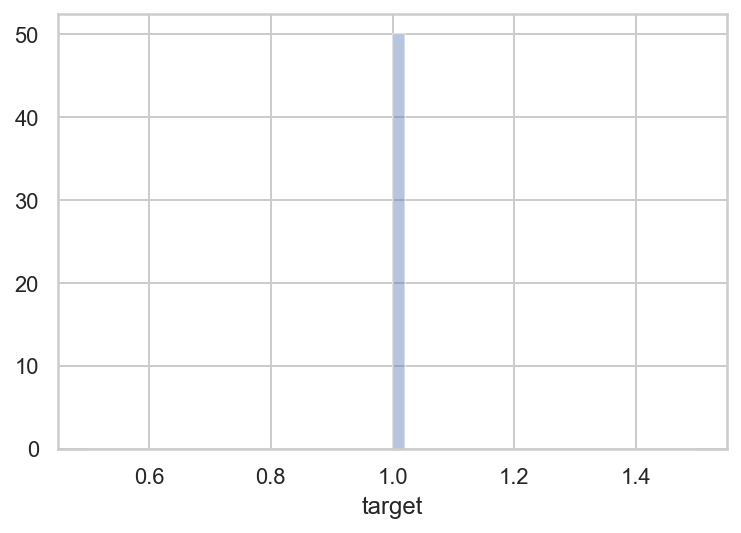

In [15]:
sns.distplot(urls[urls.target==1].target)
plt.show()

In [1]:
a = [1, 2, 3]
b = [0] * 3
a + b

[1, 2, 3, 0, 0, 0]

In [ ]:
np.array()